In the example document below we show how to load and visualise the Google Trends and WHO Flunet datasets.

Changes to the demonstration in the lecture:

 - each search term result was downloaded seperately from the google trends website
 - period was May 2010 to May 2015 (Google only returns monthly summaries if you try to search for more than 5 years).
 - the full UK Flunet WHO data was downloaded (covers 1995 to present) and we use PANDAs to select the 5 years matching the Google Trends data.
 - the `read_csv` function call has been adapted to have argument `skiprows` that can skip the first lines in the datafile that are not part of the data table
 - we use the pandas `replace` function to change instances of `<1` to `0`
 - to make a fit that produces a formula to predict cases based on search terms we use the `ols` function from the `statsmethod` module.

#### Preparing the workspace and downloading the data

The following search term data was downloaded:

for period May 2010 to May 2015

 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=%2Fm%2F0cycc
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_jab
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_symptoms


(Searches were downloaded separately because Google scales the results to range 0-100 this means we have more accuracy when looking for terms that have a relatively low search volume).

Create a working directory `week_7` and store our notebook in this. Add a new subdirectory `data` where we save the output files. These are renames to:

for period May 2010 to May 2015

 - `"google_trends_flu.csv"`
 - `"google_trends_flu_jab.csv"`
 - `"google_trends_flu_symptoms.csv"`

To download the WHO Flunet data go to: https://www.who.int/tools/flunet

Then click on link: <a href="http://apps.who.int/flumart/Default.aspx?ReportNo=7">By country, area or territory - optional time period selection</a>

Select `United Kingdom of Great Britain and Northern Ireland` from 1995 week 1 to 2021 week 53, and click `Display report`. 

When the chart appears click the *Save to disk* icon and select *CVS (comma delimited)*. 

Rename the downloaded file and save it into the `data` subdirectory.

`who_flunet.csv`



In [49]:
# import libraries used by the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

We can either organise our data by putting it in our working directory, or if we have a lot of files we can put them in their own directory on our disk.


In [50]:
# generate a string containing the filepath to the file
data_path = os.path.join("data", "google_trends_flu.csv")
# 'data/google_trends_original.csv'

# load in the file.
# skiprows=3 is used to skip the lines that do not contain the data
# names=... is used to rename the columns
flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','search_vol'])
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        261 non-null    object
 1   search_vol  261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [51]:
# convert the date column from object type (storing strings) to datetime type
flu_df.date = pd.to_datetime(flu_df.date)
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        261 non-null    datetime64[ns]
 1   search_vol  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [52]:
# sometimes google trends enters writes `<1` to indicate 
# search volume was not zero but was less than 1

# in this case we can replace this with 0 (otherwise we can't convert to a number) 
flu_df['search_vol'] = flu_df['search_vol'].replace('<1','0')

# with this fixed we convert the search volume data to a 'float64'
# meaning the standard Python float type
flu_df['search_vol'] = flu_df['search_vol'].astype('float64')

flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        261 non-null    datetime64[ns]
 1   search_vol  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [53]:
flu_df.head()

,date,search_vol
0,2010-05-02,6.0
1,2010-05-09,6.0
2,2010-05-16,7.0
3,2010-05-23,6.0
4,2010-05-30,5.0


In [54]:
# to compare across data sets we will rescale to normalise
# the data by dividing by the maximum value so all values are between 0 and 1

flu_df['search_vol'] = flu_df['search_vol']/flu_df['search_vol'].max()

flu_df.head()

,date,search_vol
0,2010-05-02,0.06
1,2010-05-09,0.06
2,2010-05-16,0.07
3,2010-05-23,0.06
4,2010-05-30,0.05


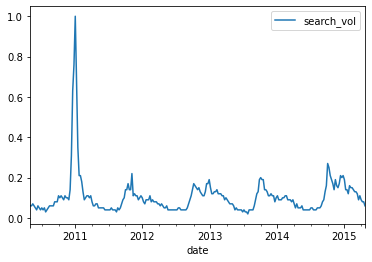

In [55]:
ax = flu_df.plot(x='date', y='search_vol')

In [56]:
# load in google trends data for searches for `flu`
data_path = os.path.join("data", "google_trends_flu.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# we will repeat the code above to load in other files
# to avoid overwriting our dataframe we rename it as gtrends_flu_df 
gtrends_flu_df = gtrends_df

In [57]:
# load in google trends data for searches for `flu jab`
data_path = os.path.join("data", "google_trends_flu_jab.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# rename as gtrends_flu_jab_df 
gtrends_flu_jab_df = gtrends_df

In [58]:
# load in google trends data for searches for `flu symptoms`
data_path = os.path.join("data", "google_trends_flu_symptoms.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# rename as gtrends_flu_symptoms_df 
gtrends_flu_symptoms_df = gtrends_df

In [59]:
# make a combined dataframe storing the results of each search term
# by taking the columns out of the three dataframes we have loaded

data_cols = [ gtrends_flu_df['date'], 
             gtrends_flu_df['search_vol'], 
             gtrends_flu_jab_df['search_vol'],
             gtrends_flu_symptoms_df['search_vol'] ]

# we use .concat to concatenate or join the columns together
# using axis=1 means stack columns together,
# (alternatively we can use axis=0 to stack rows together)

gtrends_df = pd.concat(data_cols,axis=1)

# rename the columns by search term

gtrends_df.columns = ['date', 'flu', 'flu_jab', 'flu_symptoms']

# use the date column as the index labels

gtrends_df = gtrends_df.set_index('date') 
gtrends_df

,flu,flu_jab,flu_symptoms
date,,,
2010-05-02,0.06,0.00,0.02
2010-05-09,0.06,0.01,0.04
2010-05-16,0.07,0.00,0.05
2010-05-23,0.06,0.01,0.06
2010-05-30,0.05,0.00,0.01
...,...,...,...
2015-03-29,0.11,0.01,0.08
2015-04-05,0.09,0.00,0.09
2015-04-12,0.08,0.01,0.06


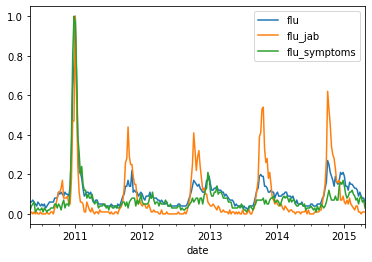

In [60]:
# by default the .plot uses the index labels for the x-data
# and plots each column as a y-data series

ax = gtrends_df.plot()

Now we can load in the WHO Flunet data. 

If we look in the downloaded file, we can see that the files produced by the WHO website has some issues:

 - it does not use sensible column heading names
 - column headings are not in a sensible order (year and week might be placed first)
 - it contains unnecessary columns storing the strain names (these could be indicated by column heading).

If you dig into the data we see:
    
 - col 1 stores label `AH5`
 - col 2 stores year
 - col 3 stores week
 - col 4 stores counts of `AH5`
 
Then the data falls into a pattern storing a column containing a strain label, followed by a column of counts.

The code below loads the data, skipping the non-data lines, and specifying simpler and more accurate column names. 

It then adds a date column from the year and week information (there is a PANDAs function for this).

Finally we select only the useful columns (date and strain counts) to produce a final better organised WHO dataset.

In [61]:
data_path = os.path.join("data", "who_flunet_uk.csv")

colnames = [ 'a_h5_label', 'year', 'week', 'a_h5',
             'a_h1_label', 'a_h1',
             'a_h1n1_label', 'a_h1n1',
             'a_h3_label', 'a_h3',
             'a_notsubtyped_label', 'a_notsubtyped',
             'b_yamagata_label', 'b_yamagata',
             'b_victoria_label', 'b_victoria',
             'b_notdetermined_label', 'b_notdetermined' ]

who_df = pd.read_csv(data_path, skiprows=4, names= colnames) 

In [62]:
date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)

who_df['date'] = date_vals

In [63]:
col_selection = [ 'date', 'a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped',
                  'b_yamagata','b_victoria','b_notdetermined' ]

who_df = who_df[col_selection]

<AxesSubplot:xlabel='date'>

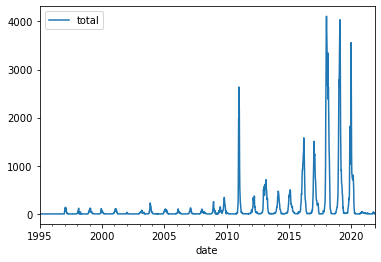

In [64]:
# to look at summary of the counts we create new columns
# that sum the a_strain counts and b_strain counts and
# then finds the total counts

a_cols = ['a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped']
b_cols = ['b_yamagata','b_victoria','b_notdetermined']

who_df['total_a'] = who_df[a_cols].sum(axis=1)
who_df['total_b'] = who_df[b_cols].sum(axis=1)
who_df['total'] = who_df['total_a'] + who_df['total_b']

who_df.plot(x='date', y='total')

In [65]:
# we now need to select a range from the who data that matches the google trends data
# we see gtrends_df has 261 rows running from 2010-05-02 to 2014-04-26
gtrends_df

,flu,flu_jab,flu_symptoms
date,,,
2010-05-02,0.06,0.00,0.02
2010-05-09,0.06,0.01,0.04
2010-05-16,0.07,0.00,0.05
2010-05-23,0.06,0.01,0.06
2010-05-30,0.05,0.00,0.01
...,...,...,...
2015-03-29,0.11,0.01,0.08
2015-04-05,0.09,0.00,0.09
2015-04-12,0.08,0.01,0.06


In [66]:
# extract the start and end dates
start_date = gtrends_df.index[0]
end_date = gtrends_df.index[-1]

print(start_date, end_date)

2010-05-02 00:00:00 2015-04-26 00:00:00


In [67]:
# select the who_df rows in this range
row_selection = (who_df['date'] >= start_date) & (who_df['date'] <= end_date)

# update who_df to keep only this selection
who_df = who_df[row_selection]
who_df

,date,a_h5,a_h1,a_h1n1,a_h3,a_notsubtyped,b_yamagata,b_victoria,b_notdetermined,total_a,total_b,total
800,2010-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,2010-05-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
802,2010-05-17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
803,2010-05-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,2010-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2015-03-23,NaN,0.0,6.0,36.0,10.0,17.0,0.0,85.0,52.0,102.0,154.0
1056,2015-03-30,NaN,0.0,9.0,15.0,14.0,23.0,3.0,90.0,38.0,116.0,154.0
1057,2015-04-06,NaN,0.0,3.0,10.0,11.0,11.0,2.0,101.0,24.0,114.0,138.0
1058,2015-04-13,NaN,0.0,4.0,5.0,7.0,30.0,0.0,107.0,16.0,137.0,153.0


In [81]:
# recall gtrends_df has 261 rows running from 2010-05-02 to 2014-04-26
# who_df has 260 rows running from 2010-05-03 to 2014-04-20

# there is a slight mismatch in the start date used for the week
# and if we want to combine the data into a single data frame
# we need to fix this so they have a matching index

# we could try to see if we can adjust this (e.g. start the google trends a day earlier)
# but for now we will create an adjusted date column so that the weekly
# entries are aligned with the google trends entries

# Therefore I need to set the index labels to be the date minus 1 day to match the 
# google trends values

# to work out how to add a day I did a google search 
# for "pandas add a day to a datetime"

# from the results I found I had to use pd.Timedelta()
# to make an interval (here 'D' for day) that can be
# subtracted from the datetime values

who_df.index = who_df['date'] - pd.Timedelta(1, unit='D')
who_df

,date,a_h5,a_h1,a_h1n1,a_h3,a_notsubtyped,b_yamagata,b_victoria,b_notdetermined,total_a,total_b,total
date,,,,,,,,,,,,
2010-05-02,2010-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-09,2010-05-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2010-05-16,2010-05-17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2010-05-23,2010-05-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-30,2010-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-22,2015-03-23,NaN,0.0,6.0,36.0,10.0,17.0,0.0,85.0,52.0,102.0,154.0
2015-03-29,2015-03-30,NaN,0.0,9.0,15.0,14.0,23.0,3.0,90.0,38.0,116.0,154.0
2015-04-05,2015-04-06,NaN,0.0,3.0,10.0,11.0,11.0,2.0,101.0,24.0,114.0,138.0


In [79]:
# now we can concatenate the columns we want into a combined dataframe
# (this requires matching row indexes for the columns to be joined)

gtrend_cols = gtrends_df[ ['flu', 'flu_jab','flu_symptoms'] ]
who_cols = who_df['total']

flu_df = pd.concat(  [ gtrend_cols, who_cols ],
                      axis=1 )

flu_df

,flu,flu_jab,flu_symptoms,total
date,,,,
2010-05-02,0.06,0.00,0.02,0.0
2010-05-09,0.06,0.01,0.04,1.0
2010-05-16,0.07,0.00,0.05,2.0
2010-05-23,0.06,0.01,0.06,0.0
2010-05-30,0.05,0.00,0.01,0.0
...,...,...,...,...
2015-03-29,0.11,0.01,0.08,154.0
2015-04-05,0.09,0.00,0.09,138.0
2015-04-12,0.08,0.01,0.06,153.0


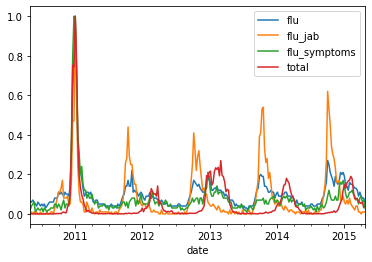

In [80]:
# for plotting it makes it easier to normalise the actual counts 
# in the same way as we did for the search data

flu_df['total'] = flu_df['total']/flu_df['total'].max()


# now we can plot and all the series are normalised so maximum value is 1

ax = flu_df.plot()

In [71]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='total ~ flu + flu_jab + flu_symptoms', data=flu_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     560.9
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          3.39e-112
Time:                        13:59:31   Log-Likelihood:                 451.98
No. Observations:                 260   AIC:                            -896.0
Df Residuals:                     256   BIC:                            -881.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0496      0.006     -8.682      0.000      -0.061      -0.038
flu              1.0178      0.145      7.001      0.000       0.731       1.304
flu_jab         -0.4113      0.047     -8.716      0.000      -0.504      -0.318
flu_symptoms     0.3813      0.098      3.871      0.000       0.187       0.575
==============================================================================
Omnibus:                       26.554   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.614
Skew:                           0.432   Prob(JB):                     7.65e-16
Kurtosis:                       5.383   Cond. No.                         67.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# The analysis produces a formula for estimating the number of counts
# from the number of searches for 'flu' 'flu jab' and 'flu symptoms'

result = ( f"predicted_total = {lm.params['flu']:.3f}*flu "+
           f"+ {lm.params['flu_jab']:.3f}*flu_jab "+
           f"+ {lm.params['flu_symptoms']:.3f}*flu_symptoms")

result

'predicted_total = 1.018*flu + -0.411*flu_jab + 0.381*flu_symptoms'

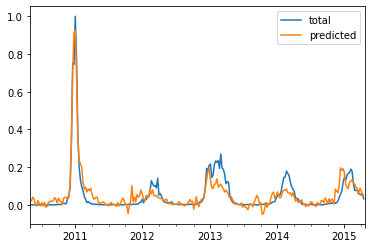

In [75]:
# We see that we end up with a formula that subtracts the number 
# of searches for `flu jab` this is expected because
# if we take the search volume for 'flu' we need to
# make a negative correction based on the likely number 
# of people looking for information on flu jabs
# rather than relating to them having flu symptoms


# below we plot the results of the analysis showing predicted 
# flu case numbers based on searches

# Note although the agreement looks good (the r-squared is 0.86)
# the fitting used optimises the fit values
# to make the fit as good as possible
# A real test would be to apply our predictions to
# predict flu counts in the years that follow


flu_df['predicted'] = lm.fittedvalues

ax = flu_df.plot(y=['total','predicted'])